# Collinearity and Multicolinearity 

Collinearity and Multicollinearity occur when there is a linear relationship between two or more variables.  


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Two vectors are collinear if they are pointing in the opposite or same direction.

Text(0.5,1,'Colinear in Same Directions')

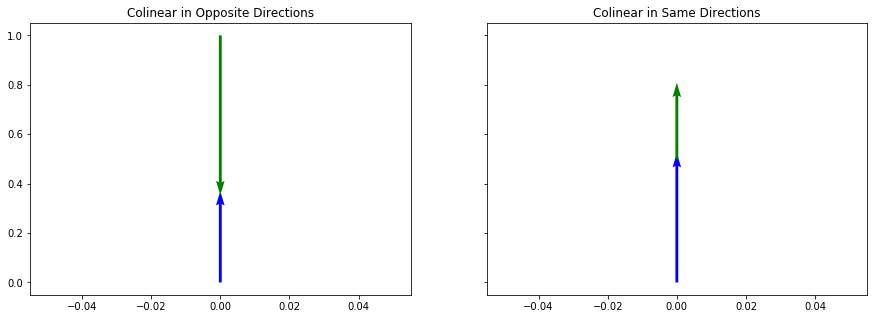

In [2]:
opp = np.array([[0,12],[0,-21]])
same = np.array([[0,17],[0,10]])

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15,5))
ax1.quiver([0, 0], [0, 1],opp[:,0], opp[:,1], color=['b','g'], scale =50)
ax1.set_title('Colinear in Opposite Directions')
ax2.quiver([0, 0], [0, 0.5],same[:,0], same[:,1], color=['b','g'], scale =50)
ax2.set_title('Colinear in Same Directions')

#### Two variable are collinear if there is a linear relationship between them.  For simple datasets, it's often easy enough to look at individual scatterplots or pairwise scatterplots.

Text(0.5,1,'Collinearity')

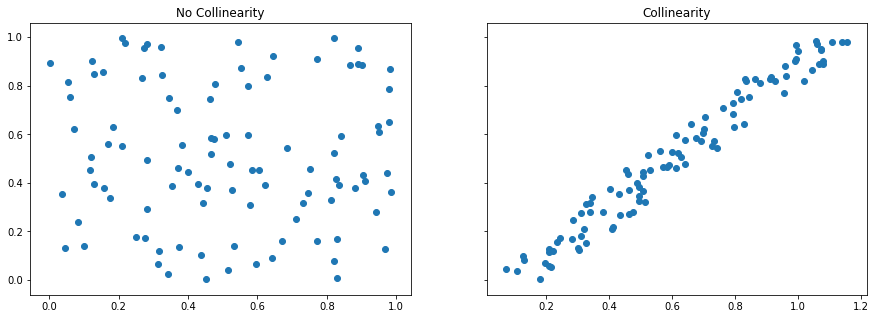

In [3]:
random1 = np.random.rand(100)
random2 = np.random.rand(100)
colinear = (random1 + (random2*0.2))

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15,5))
ax1.scatter(random1,random2)
ax1.set_title('No Collinearity')
ax2.scatter(colinear,random1)
ax2.set_title('Collinearity')

#### For larger datasets, a pairplot can be very useful to view all the relationships in one plot.

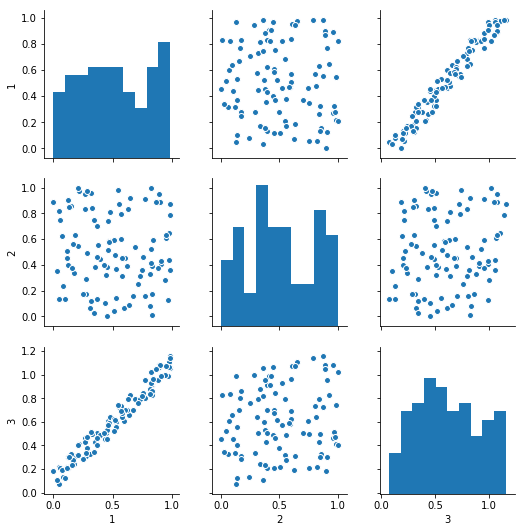

In [4]:
data = pd.DataFrame({1:random1,2:random2,3:colinear})
sns.pairplot(data)

#### Collinearity is not always visible by plotting and with larger datasets, this can become a very challenging task.